In [16]:
#Implementation of Naive Bayes Classifier from scratch on Titanic Data set (without using scikit-learn)

#Importing important Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
#Analysing data shape such as features and first five rows of the data set
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Checking the shape of the data set i.e. number of rows and columns and data type of each feature
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Anaconda_Navigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


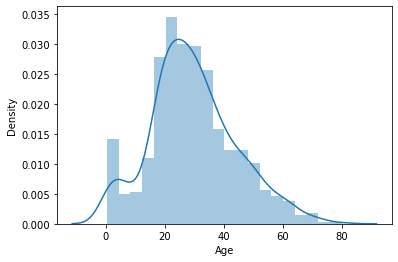

C:\Anaconda_Navigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


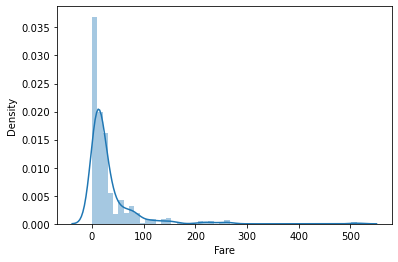

C:\Anaconda_Navigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


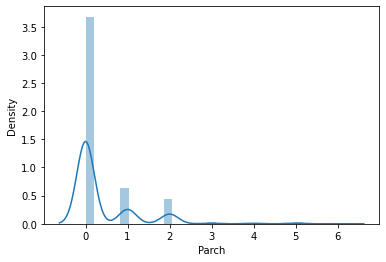

C:\Anaconda_Navigator\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


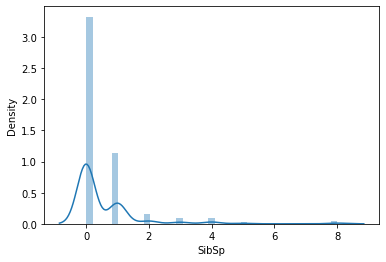

In [17]:
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_numeric_features:
    sns.distplot(df_train[feature])
    plt.show()

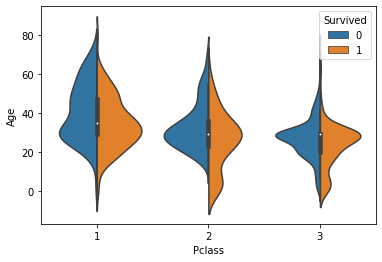

In [8]:
#After Cleaning the data set, keeping only the features which helps in our prediction, for simplicity I used only 3 feautes they are Class, Sex and Age
sexos={"male":0, "female":1}
df_train.Sex=[sexos[item] for item in df_train.Sex]
df_test.Sex=[sexos[item] for item in df_test.Sex]

df_train.Age.fillna(df_train.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

df_train.Age=df_train.Age.astype(int)
df_test.Age=df_test.Age.astype(int)

#A wild plot has appeared, just for the heck of it
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True)

#Ages grouped
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [9]:
#Predicting the probabilities of the features

Class_counts=df_train['Pclass'].value_counts()  
p_Class=Class_counts/len(df_train)

Sex_counts=df_train['Sex'].value_counts()
p_Sex=Sex_counts/len(df_train)

Age_counts=df_train['Age'].value_counts()
p_Age=Age_counts/len(df_train)

# Survival and Death probabilities
y_counts=df_train['Survived'].value_counts()
p_y=y_counts/len(df_train)

df_survived=df_train.loc[df_train['Survived'] == 1]
df_died=df_train.loc[df_train['Survived'] == 0]

# Conditional probabilities
#class/survived
class_survived_counts=df_survived['Pclass'].value_counts()  
p_class_survived=class_survived_counts/len(df_survived)

# class/died
class_died_counts=df_died['Pclass'].value_counts()  
p_class_died=class_died_counts/len(df_died)

#sex/survived
sex_survived_counts=df_survived['Sex'].value_counts()  
p_sex_survived=sex_survived_counts/len(df_survived)

sex_died_counts=df_died['Sex'].value_counts()  
p_sex_died=sex_died_counts/len(df_died)

#Age/survived
age_survived_counts=df_survived['Age'].value_counts()  
p_age_survived=age_survived_counts/len(df_survived)

age_died_counts=df_died['Age'].value_counts()  
p_age_died=age_died_counts/len(df_died)

In [10]:
#Bayes function defined:

def Bayes(py, px1y, px2y, px3y, px1, px2, px3):
    numerator=px1y*px2y*px3y*py
    denominator=px1*px2*px3
    p=numerator/denominator
    return p

In [11]:
#The probabilities of survival for each passenger is calculated below:

result_array=[]

for i in range(0,418):
    feature_class=df_test.iloc[i]['Pclass']
    feature_sex=df_test.iloc[i]['Sex']
    feature_age=df_test.iloc[i]['Age']
    
    P_Y1=Bayes(p_y[1], p_class_survived[feature_class], p_sex_survived[feature_sex], p_age_survived[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    P_Y0=Bayes(p_y[0], p_class_died[feature_class], p_sex_died[feature_sex], p_age_died[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)


output = pd.DataFrame({'PassengerId': df_test.PassengerId,'Survived': result_array})
output.to_csv('submission.csv', index=False)

In [12]:
print(result_array)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [13]:
#This predictor scored 0.77033, which is not that bad for a model without using Scikit-learn library